In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull()

,city,driver_count,type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
115,False,False,False
116,False,False,False
117,False,False,False
118,False,False,False


In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
city_data_df.city.value_counts()

West Ericstad         1
Lake Jonathanshire    1
Richardfort           1
Williamsview          1
West Heidi            1
                     ..
Jerryton              1
Port Johnbury         1
Liumouth              1
Lake Latoyabury       1
Royland               1
Name: city, Length: 120, dtype: int64

In [22]:
pyber_data_df.city == 'West Angela'

NameError: name 'pyber_data_df' is not defined

In [ ]:
pyber_data_df[pyber_data_df.city== 'West Angela']

In [23]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [ ]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

In [ ]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [ ]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

In [ ]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [ ]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

In [ ]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [ ]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

In [ ]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [ ]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

In [ ]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

In [ ]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [ ]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [ ]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [ ]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

In [ ]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

In [ ]:
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [ ]:
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

In [ ]:
# Save the figure.
plt.savefig("analysis/Fig1.png")

In [ ]:
# Get summary statistics.
urban_cities_df.describe()

In [ ]:
# Get summary statistics.
urban_ride_count.describe()

In [ ]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

In [ ]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

In [ ]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

In [ ]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [ ]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

In [ ]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

In [ ]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

In [ ]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

NameError: name 'urban_ride_count' is not defined

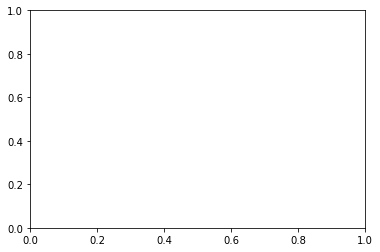

In [54]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [53]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

NameError: name 'urban_ride_count' is not defined

In [ ]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

NameError: name 'urban_fares' is not defined

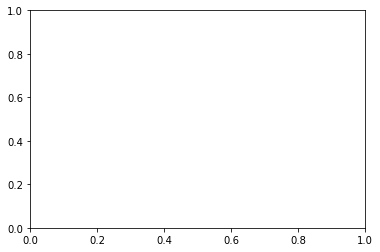

In [52]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

NameError: name 'urban_drivers' is not defined

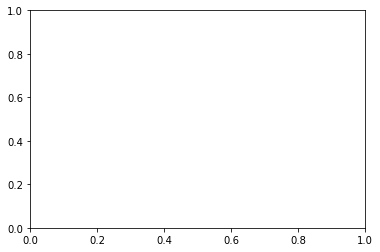

In [51]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [50]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [49]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [ ]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

In [48]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

NameError: name 'type_percents' is not defined

In [46]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

NameError: name 'type_percents' is not defined

In [ ]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [45]:
pyber_data_df["ride_id"].count()

2375

In [44]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [ ]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [43]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 *
city_data_df.groupby(["type"]).sum()["driver_count"] /
city_data_df["driver_count"].sum()
driver_percents

SyntaxError: invalid syntax (<ipython-input-43-5545b8191b9a>, line 2)

In [ ]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [42]:
# Total Rides Step 1 

#to create a Series of data that has the name of 
#the city as the index, then apply the count() method to the "ride_id" column
#Total_Rides = pyber_data_df.groupby(["city"]).count()["ride_id"]
#Total_Rides.head()
Total_Rides = pyber_data_df.groupby(["type"]).sum()["ride_id"]
Total_Rides.head()

type
Rural        580968240341287
Suburban    3106884522576766
Urban       7919412664056093
Name: ride_id, dtype: int64

In [41]:
#Total_Drivers
#Step 2, use the groupby() function to create a Series of data that has the name 
# of the city as the index, then apply the sum() method to the "driver_count" column.
# Get the number of rides for urban cities.
Total_Drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers.head()

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [40]:
# Step 3, 
#use the groupby() function to create 
#a Series of data that has the name of the city as the index, then apply the sum() method to the "fare" column.
Total_Fares = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [39]:
#Total Fares; sum of all the fares
# Get the sum of all the fares.
Total_Fares = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [38]:
#total Rides
Total_Rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_Rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [37]:
#Step 4 Average Fare Per Ride
#calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
Ave_Fare_Per_Ride = total_fares/total_rides
Ave_Fare_Per_Ride

NameError: name 'total_fares' is not defined

In [36]:
#Sum of all Fares
Sum_Of_All_Fares=pyber_data_df.groupby(["date","type"]).sum()["fare"]
Sum_Of_All_Fares

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [35]:
#Step 5, calculate the average fare per driver by city type by dividing the sum of all the fares by the total drivers.
average_fare_per_driver = sum_of_all_fares/total_drivers
average_fare_per_driver


NameError: name 'sum_of_all_fares' is not defined

In [ ]:
#Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5, using the column names shown below
#Do

## initialise data of lists. 
data = {'Name':['Tom', 'Jack', 'nick', 'juli'], 'marks':[99, 98, 95, 90]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['rank1', 'rank2', 'rank3', 'rank4']) 
  
# print the data 
df 

Data = pyber_data_df('Total Rides':['total_rides'], 'Total Drivers':['total_drivers'], 'Total Fares':['total_fares'], 'Average Fare Per Ride':['average_fare_per_ride'], 'Average Fare Per Driver':['average_fare_per_driver'])
df = pyber_data_df, index = ['type']           

In [ ]:
indexes = pyber_data_df.type.unique()

In [ ]:
Total_Rides.values

In [ ]:
Total_Drivers = city_data_df.groupby('type')[['driver_count']].sum()
Total_Drivers

In [ ]:
df = Total_Rides.to_frame().rename(columns={'ride_id': 'Total Rides'})
df["Total Driver"] = Total_Drivers
df["Total Fares"] = Total_Fares

In [ ]:
df = pd.DataFrame({"Total_Rides": Total_Rides.values}, index=indexes)

df

In [ ]:
#Step 7, use the provided code snippet to remove the index name ("type") from the PyBer summary DataFrame.

In [ ]:
pyber_data_df


In [ ]:
#Step 8, format the columns of the Pyber summary DataFrame to look like this:

In [34]:
#Step 9, create a new DataFrame with multiple indices using the groupby() function on the "type" and "date" columns of the pyber_data_df DataFrame, 
#then apply the sum() method on the "fare" column to show the total fare amount for each date.

Total_Fares = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
Total_Fares.head





<bound method NDFrame.head of                                fare
date                type           
2019-01-01 00:08:16 Urban     37.91
2019-01-01 00:46:46 Suburban  47.74
2019-01-01 02:07:24 Suburban  24.07
2019-01-01 03:46:50 Urban      7.57
2019-01-01 05:23:21 Urban     10.75
...                             ...
2019-05-08 04:20:00 Urban     21.99
2019-05-08 04:39:49 Urban     18.45
2019-05-08 07:29:01 Urban     18.55
2019-05-08 11:38:35 Urban     19.77
2019-05-08 13:10:18 Urban     18.04

[2375 rows x 1 columns]>

In [ ]:
#Step 10, use the provided code snippet to reset the index. This is needed to use the pivot() function in Step 11.


In [33]:
#use the pivot() function to convert the DataFrame from 
#Step 10 so that the index is the "date," each column is a city "type," and the values are the "fare."
#df.pivot(index='foo', columns='bar', values='baz')

pyber_data_df.pivot(index='date', column='type', values=sum()"fare")


SyntaxError: invalid syntax (<ipython-input-33-4252aeb22871>, line 5)

In [29]:
#Step 11, use the pivot() function to convert the DataFrame from Step 10 so that the index is the "date," 
#each column is a city "type," and the values are the "fare."

#df.pivot(index ='A', columns ='B', values =['C', 'A']) 

pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [30]:
#12
#mask = (df['date'] > start_date) & (df['date'] <= end_date)
mask = (pyber_data_df['date'] > 2019-01-01) & (pyber_data_df['date'] <= 2019-29-04)
pyber_data_df.loc[mask]

SyntaxError: invalid token (<ipython-input-30-7f97b728627a>, line 3)

In [31]:
#Step 12
#create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-29.
#df.loc[start_date : end_date] 

pyber_data_df.loc(['date' = 2019-01-01:2019-04-29])

SyntaxError: invalid syntax (<ipython-input-31-a0bbd9d3b04a>, line 5)

In [32]:
#Step 13, use the provided code snippet to reset the index of the DataFrame from Step 12 to a datetime data type. 
#This is necessary to use the resample() method in Step 15.
#index = pd.date_range('1/1/2000', periods=9, freq='T')

index = pyber_data_df.date_range('2019-01-01', periods=12, freq= 'W')

AttributeError: 'DataFrame' object has no attribute 'date_range'

In [ ]:
#Step 14, use the provided code snippet, df.info(), to check that the "date" is a datetime data type.

In [ ]:
#Step 15, create a new DataFrame by applying the resample() function to the DataFrame you modified in Step 13. 
#Resample the data in weekly bins, then apply the sum() method to get the total fares for each week.

#range = pd.date_range(start = '5/3/2005', periods =5+1, freq='1D')
range=pyber_data_df.date_range(2019-01-01), periods = 7


In [ ]:
#Step 16, graph the resampled DataFrame from Step 15 using the object-oriented interface method and the df.plot() method, 
#as well as the Matplotlib "fivethirtyeight" graph style code snippet provided in the starter code. 
#Annotate the y-axis label and the title, then use the appropriate code to save the figure as PyBer_fare_summary.png#
#in your "analysis" folder.
#Confirm that your multiple-line chart looks like the following

In [ ]:
#A DataFrame was created using the groupby() function on the "type" and "date" columns, and the sum() method is applied on the "fare" column to show the 
#total fare amount for each date and time. (10 pt)
Total_Fares = pyber_data_df.groupby(["date", type]).sum()[["fare"]]
Total_Fares.head

In [24]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
#DataFrame was created using the pivot() function 
#where the index is the "date," the columns are the city "type," and the values are the "fare." (10 pt)

pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [26]:
#DataFrame was created using the resample() function in weekly bins and shows the sum of the fares for each week. (10 pt)
#range = pd.date_range(start = '5/3/2005', periods =5+1, freq='1D')

range = pyber_data_df.date_range(start = '2019-01-01', periods = 24, freqs='W')

sumfares = pyber_data_df.sumfares_pivot.resample("W"), sum()['fare']

#Total_Fares = pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]
#Total_Fares = pyber_data_df.resample("W"), sum()["fare"]

AttributeError: 'DataFrame' object has no attribute 'date_range'

In [19]:
#df.plot(kind='line',x='name',y='num_children',ax=ax)
#df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

pyber_data_df.plot(kind='line', x= 'Jan', 'Feb', 'Mar', 'April', y= 'fare' )

SyntaxError: positional argument follows keyword argument (<ipython-input-19-ed33b00af893>, line 4)

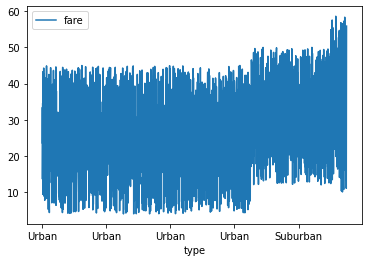

In [27]:
#df.plot(x='x', y='y')
pyber_data_df.plot(x= 'type', y='fare')


In [61]:

plt.plot(x1, ya, label = 'Rural')
x1 = ['date']
y1 = ['fare']



NameError: name 'x1' is not defined